In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [74]:
df = pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [8]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Top 5 Zip Codes for 911 calls

In [12]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 Townships for 911 calls

In [14]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Number of Unique codes in title column

In [17]:
df['title'].nunique()

110

A new column called "Reasons", derived from title column. Pulls the first part out of the string to classify as either EMS, Fire, or Traffic

In [86]:
def reasons(string):
    """Splits the string into two items on a list at a : """
    rlist = string.split(':')
    reason = rlist[0]
    return reason

df['Reasons'] = df['title'].apply(reasons)


Most common reason for 911 calls (based off new column)

In [29]:
vcdf = df['Reasons'].value_counts()
vcdf[vcdf == vcdf.max()]

EMS    48877
Name: Reasons, dtype: int64

<AxesSubplot:xlabel='Reasons', ylabel='count'>

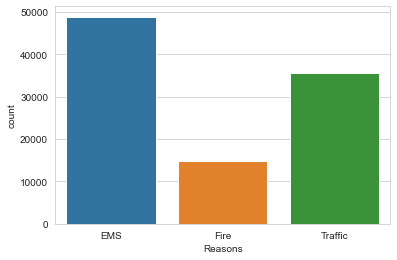

In [31]:
sns.countplot(x='Reasons', data=df)

Type of objects in timeStamp column

In [44]:
type(df['timeStamp'].iloc[0])

str

Converting the strings to timestamps

In [59]:
cdf = df['timeStamp'].apply(pd.to_datetime)

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

Creating 3 new columns, Hour, Month and Day of the Week

In [87]:
df['Hour'] = cdf.apply(lambda time: time.hour)
df['Month'] = cdf.apply(lambda time: time.month)
df['Day of the Week'] = cdf.apply(lambda time: time.dayofweek)

Day of the Week Column is an integer, transforming it to the appropriate string

In [88]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of the Week'] = df['Day of the Week'].map(dmap)

Now for some graphs.

<AxesSubplot:xlabel='Day of the Week', ylabel='count'>

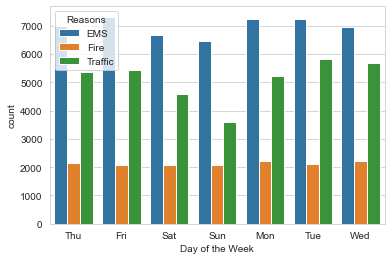

In [89]:
sns.countplot(x='Day of the Week', data=df, hue='Reasons')

<AxesSubplot:xlabel='Month', ylabel='count'>

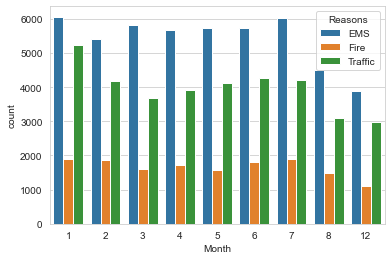

In [91]:
sns.countplot(x='Month', data=df, hue='Reasons')

We're missing some months, let's see what we can do about that

<AxesSubplot:xlabel='Month'>

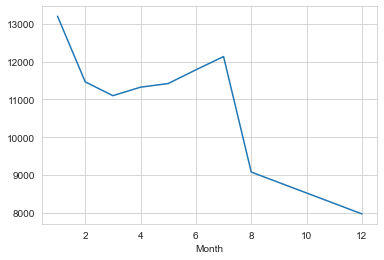

In [101]:
byMonth = df.groupby('Month').count()
byMonth['lat'].plot()

Linear plot of calls per month

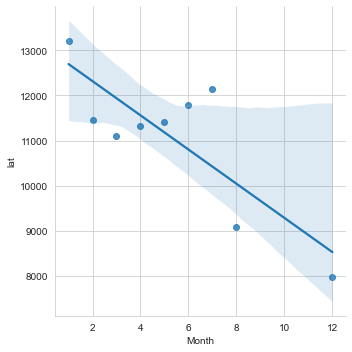

In [102]:
byMonth.reset_index(inplace=True)
sns.lmplot(x='Month', y='lat', data=byMonth)

Creating a new column Date

In [108]:
df['Date'] = cdf.apply(lambda time: time.date())

Plotting 911 calls by date

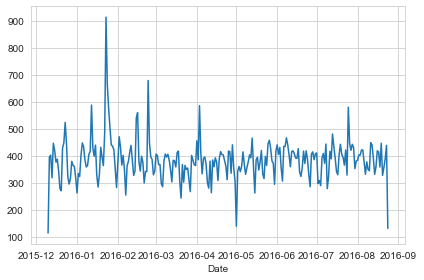

In [113]:
byDate = df.groupby('Date').count()
byDate['lat'].plot()
plt.tight_layout()

Plotting the calls by date for each separate reason

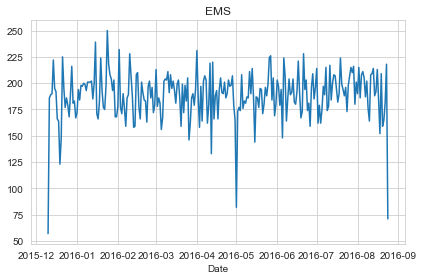

In [117]:
byDate = df[df['Reasons'] == 'EMS'].groupby('Date').count()
byDate['lat'].plot()
plt.title('EMS')
plt.tight_layout()

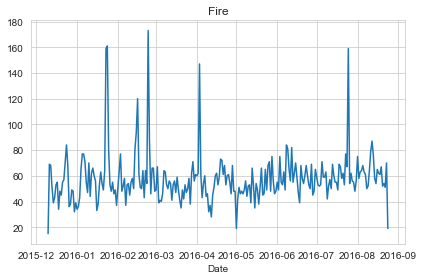

In [119]:
byDate = df[df['Reasons'] == 'Fire'].groupby('Date').count()
byDate['lat'].plot()
plt.title('Fire')
plt.tight_layout()

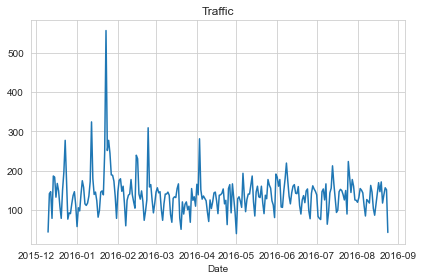

In [121]:
byDate = df[df['Reasons'] == 'Traffic'].groupby('Date').count()
byDate['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

Converting the data for use with a Heatmap

<AxesSubplot:ylabel='Day of the Week'>

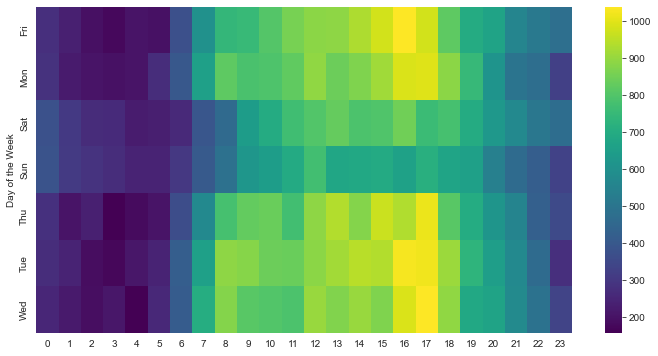

In [141]:
fdf = pd.DataFrame()
y = 0
for x in range(0, 24):
    fdf[y] = df[df['Hour'] == y].groupby('Day of the Week').count()['timeStamp']
    y += 1
plt.figure(figsize=(12,6))
sns.heatmap(fdf, cmap='viridis')

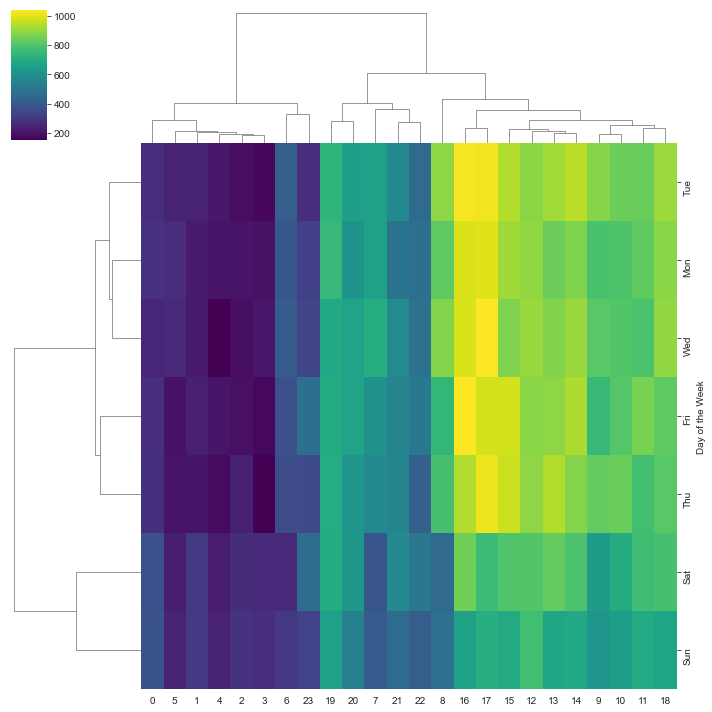

In [144]:
sns.clustermap(fdf, cmap='viridis')

Doing the same thing, but with Months

<AxesSubplot:ylabel='Day of the Week'>

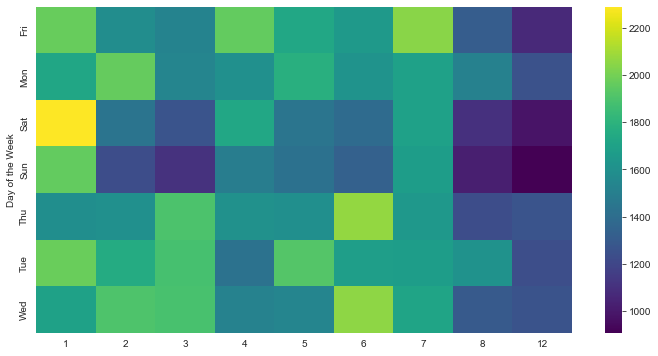

In [154]:
fdf2 = pd.DataFrame()
y = 1
for x in range(1, 13):
    fdf2[y] = df[df['Month'] == y].groupby('Day of the Week').count()['timeStamp']
    y += 1
fdf2.dropna(axis=1, inplace=True)
fdf2
plt.figure(figsize=(12,6))
sns.heatmap(fdf2, cmap='viridis')

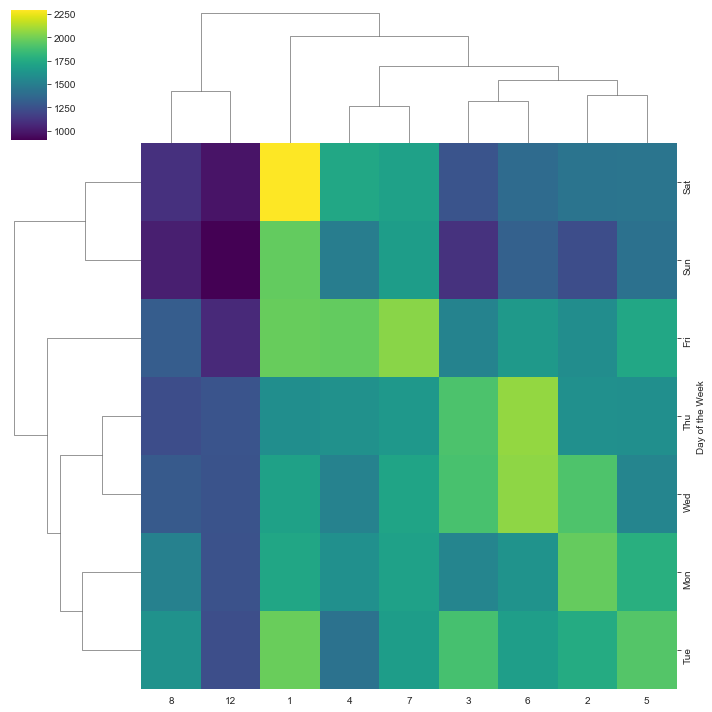

In [155]:
sns.clustermap(fdf2, cmap='viridis')